# KANIA PUTRI ANANDA
# 2109106006
## PRAKTIKUM KECERDASAN BUATAN
## POSTTEST 4

### Dataset: Heart Disease Report
### Informasi Atribut:
### age: Umur orang
### sex: jenis kelamin (1 = laki-laki, 0 = perempuan)
### cp: Nyeri dada yang dialami (Nilai 1: angina tipikal, Nilai 2: angina atipikal, Nilai 3: nyeri non-angina, Nilai 4: asimtomatik)
### trestbps: Tekanan darah istirahat seseorang (mm Hg saat masuk ke rumah sakit)
### chol: Pengukuran kolesterol seseorang dalam mg/dl
### fbs: Gula darah puasa seseorang (> 120 mg/dl, 1 = true; 0 = false)
### restecg: Pengukuran elektrokardiografi saat istirahat (0 = normal, 1 = memiliki kelainan gelombang ST-T, 2 = menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes)
### thalach: Detak jantung maksimum seseorang tercapai
### exang: Angina yang diinduksi oleh olahraga (1 = ya; 0 = tidak)
### oldpeak: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
### slope: kemiringan segmen ST latihan puncak (Nilai 1: miring ke atas, Nilai 2: datar, Nilai 3: miring ke bawah)
### ca: Jumlah dari major vessels (0-3)
### thal: Kelainan darah yang disebut talasemia (3 = normal; 6 = cacat tetap; 7 = cacat reversibel)
### target: Penyakit jantung (0 = tidak, 1 = ya)

In [2]:
import pandas as pd
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

# Unsupervised Learning

In [4]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# SUBSET & DATA SCALING

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
df_subset = df[['trestbps', 'thalach']]
ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

# K-MEANS CLUSTERING

In [25]:
from sklearn.cluster import KMeans

In [26]:
model_kmeans = KMeans(n_clusters = 3)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [27]:
labels = model_kmeans.labels_
print(labels)

[2 2 0 ... 0 2 0]


# CROSS_TAB UNTUK MEMBANDINGKAN ANTAR CLUSTER

In [35]:
df_kmeans = pd.DataFrame({'labels': labels, 'cp': df.cp})

In [36]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['cp'])
print(ct1)

cp        0    1    2   3
labels                   
0       242   25   53  16
1        94   16   53  33
2       161  126  178  28


# VISUALISASI CENTROID

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [38]:
xs = x_scaled[:,0]
ys = x_scaled[:,1]

centroids = model_kmeans.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

In [ ]:
# visualisasi cluster
plt.figure(figsize=(10,10))

#titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha=0.5, c = labels) #alpha untuk menampilkan data yang ketumpuk

#titik-titik centroid 
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker="D", s=50) #marker untuk mengganti bentuk titik-titiknya

#beri label
plt.xlabel("trestbps")
plt.ylabel("thalach")
           
plt.legend()
plt.show()

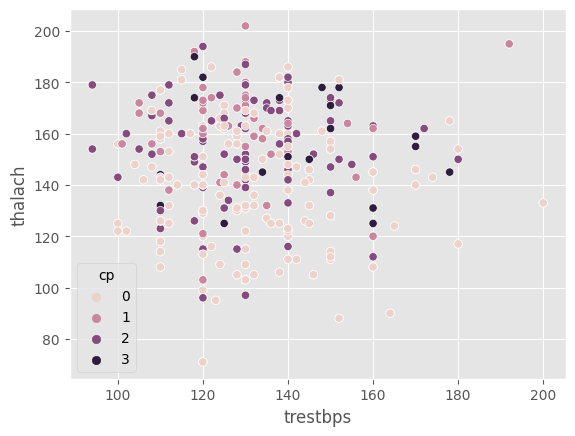

In [42]:
# LABEL AKTUAL
df_aktual = df[["trestbps", "thalach", "cp"]]
sns.scatterplot(x = "trestbps", y = "thalach", data = df_aktual, hue = "cp")
plt.show()

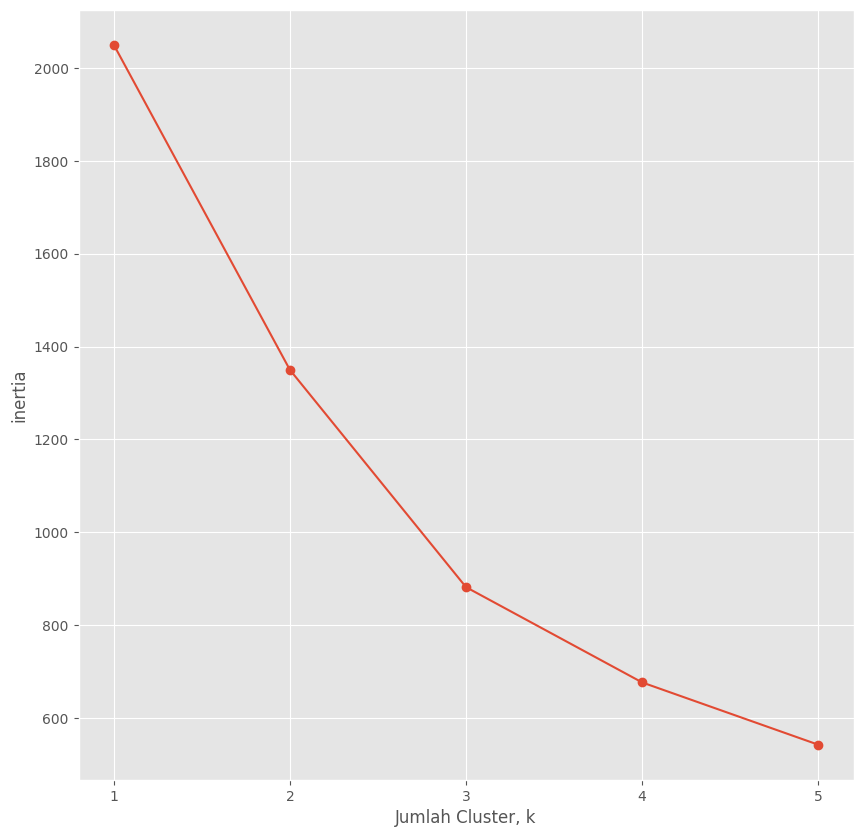

In [43]:
# menentukan jumlah cluster (elbow method)

ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# EVALUASI MODEL KMEANS

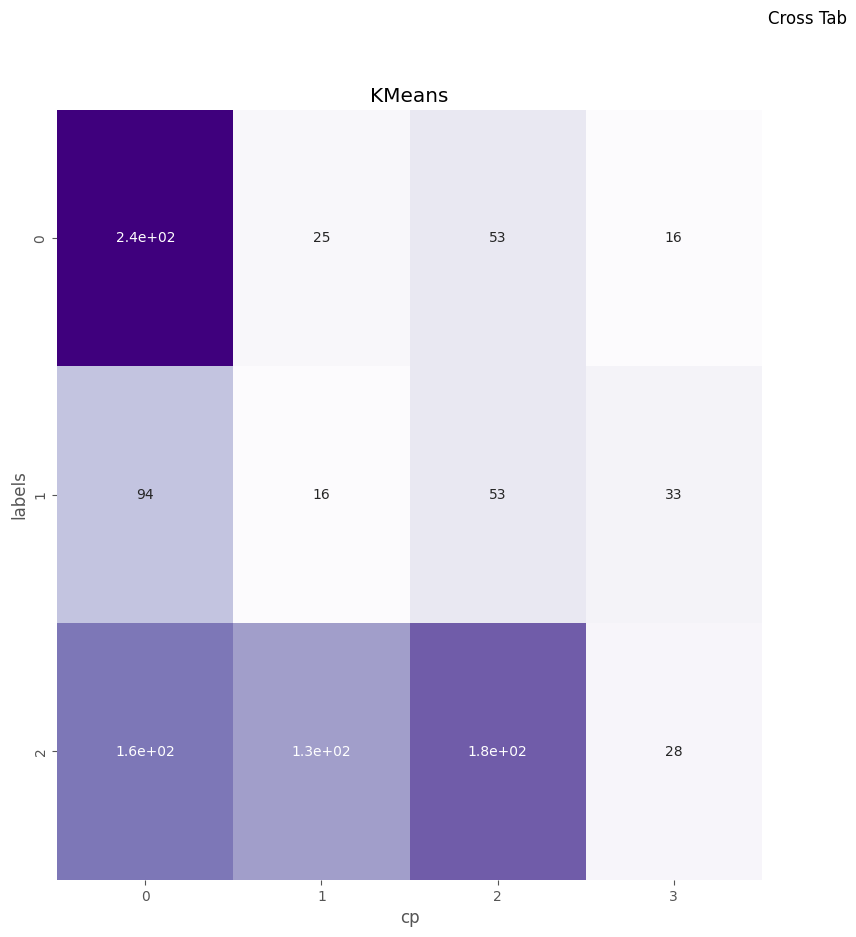

In [44]:
plt.figure(figsize=(20,10))
plt.suptitle("Cross Tab")

plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1, annot=True, cbar=False, cmap="Purples")

plt.show()